## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = 'Tissue_Studies/09_11_18_Regional'
bucket = 'ccurtis.data'

vids = 15
types = ['PEG', 'PS']
pups = [2, 3]
slices = [1, 2, 3]
counter = 0
for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                try:
                    #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                    #to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))
                    filename = 'features_{}_P{}_S{}_XY{}.csv'.format(typ, pup, slic, '%02d' % num)
                    aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                    fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                    fstats['Particle Type'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                    fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                    fstats['Slices'] = pd.Series(fstats.shape[0]*[str(slic)], index=fstats.index)
                    fstats['Pup'] = pd.Series(fstats.shape[0]*[str(pup)], index=fstats.index)
                    if num in range(1, 6):
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Cortex'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Cortex'.format(typ)], index=fstats.index)
                    elif num in range(6, 11):
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Hippocampus'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Hippocampus'.format(typ)], index=fstats.index)
                    else:
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Thalamus'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Thalamus'.format(typ)], index=fstats.index)
                    #print(num)
                    print(filename)
                    counter = counter + 1
                    if counter == 1:
                        fstats_tot = fstats
                    else:
                        fstats_tot = fstats_tot.append(fstats, ignore_index=True)
                except:
                    print('skipped filename: {}'.format(filename))

features_PEG_P2_S1_XY01.csv
features_PEG_P2_S1_XY02.csv
features_PEG_P2_S1_XY03.csv
features_PEG_P2_S1_XY04.csv
features_PEG_P2_S1_XY05.csv
features_PEG_P2_S1_XY06.csv
features_PEG_P2_S1_XY07.csv
features_PEG_P2_S1_XY08.csv
features_PEG_P2_S1_XY09.csv
features_PEG_P2_S1_XY10.csv
features_PEG_P2_S1_XY11.csv
features_PEG_P2_S1_XY12.csv
features_PEG_P2_S1_XY13.csv
features_PEG_P2_S1_XY14.csv
features_PEG_P2_S1_XY15.csv
features_PEG_P2_S2_XY01.csv
features_PEG_P2_S2_XY02.csv
features_PEG_P2_S2_XY03.csv
features_PEG_P2_S2_XY04.csv
features_PEG_P2_S2_XY05.csv
features_PEG_P2_S2_XY06.csv
features_PEG_P2_S2_XY07.csv
features_PEG_P2_S2_XY08.csv
features_PEG_P2_S2_XY09.csv
features_PEG_P2_S2_XY10.csv
features_PEG_P2_S2_XY11.csv
skipped filename: features_PEG_P2_S2_XY12.csv
skipped filename: features_PEG_P2_S2_XY13.csv
features_PEG_P2_S2_XY14.csv
features_PEG_P2_S2_XY15.csv
features_PEG_P2_S3_XY01.csv
features_PEG_P2_S3_XY02.csv
features_PEG_P2_S3_XY03.csv
features_PEG_P2_S3_XY04.csv
features_PEG

In [ ]:
fstats_tot.to_csv('features.csv')

In [3]:
#with equal sample sizes for each particle type
import random
counter = 0
#mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    fstats_type = fstats_tot[fstats_tot['Region and Type']==mw].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 34000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(86139, 73)
(34136, 73)
(59388, 73)
(174928, 73)
(155972, 73)
(53595, 73)


In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Slices', 'Pup', 'Region', 'Region and Type',
          'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [ ]:
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    print(fstats_tot[fstats_tot['Region and Type'] == mw].shape)

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [5]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=16)

Cumulative explained variance:
0 component: 0.2479553226604722
1 component: 0.36954325165095003
2 component: 0.44587227967978665
3 component: 0.5036805369825438
4 component: 0.5515623051953344
5 component: 0.5925014776229555
6 component: 0.6240967758590842
7 component: 0.651611824413614
8 component: 0.6780870294558347
9 component: 0.701832893012698
10 component: 0.7239913857811907
11 component: 0.7443116033481403
12 component: 0.7628118596575602
13 component: 0.780017326240953
14 component: 0.7970445927623522
15 component: 0.813561502662794


In [8]:
pcadataset.components.to_csv('components.csv')

In [10]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Mean Deff1,Mean asymmetry3,Std asymmetry2,Mean Quality,Quality,trappedness,straightness,Mean SN_Ratio,SN_Ratio,Std MSD_ratio,Std kurtosis,kurtosis,Std Deff2,Mean AR,Std AR,kurtosis
1,Mean straightness,asymmetry3,Std elongation,Quality,Mean asymmetry1,boundedness,efficiency,SN_Ratio,Mean SN_Ratio,Mean MSD_ratio,Mean kurtosis,Deff2,Mean_Intensity,Std AR,Mean AR,Std AR
2,Mean efficiency,Mean asymmetry2,Std asymmetry1,Std Quality,Mean asymmetry2,Mean Deff2,alpha,boundedness,trappedness,Std boundedness,Std boundedness,frames,kurtosis,Deff2,kurtosis,frames
3,Mean fractal_dim,Mean elongation,Std asymmetry3,trappedness,frames,Std Deff2,D_fit,trappedness,boundedness,Std trappedness,Std trappedness,D_fit,Std AR,Mean_Intensity,Deff2,Deff2
4,Mean D_fit,elongation,Std trappedness,boundedness,Mean Quality,alpha,MSD_ratio,Std MSD_ratio,Mean MSD_ratio,Std kurtosis,Std MSD_ratio,fractal_dim,Mean Deff2,Std trappedness,frames,fractal_dim


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
fstats_tot.shape

In [ ]:
for test in fstats_tot.columns:
    print(test)

In [11]:
kmostat = pca.kmo(pcadataset.scaled)

0.898276527101


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [12]:
import numpy as np
ncomp = 16
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Cortex'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Thalamus'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Cortex'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[5] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Thalamus'].values[:, -ncomp:], axis=0)

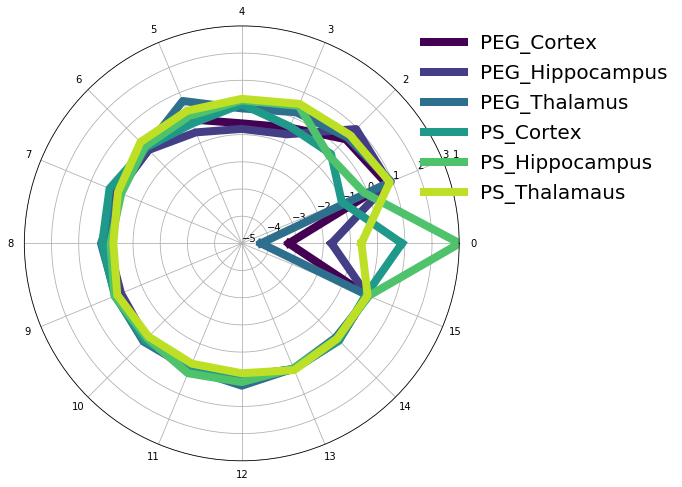

In [13]:
pca.plot_pca(dicti, savefig=True, labels=['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus',
                                          'PS_Thalamaus'], rticks=np.linspace(-5, 3, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

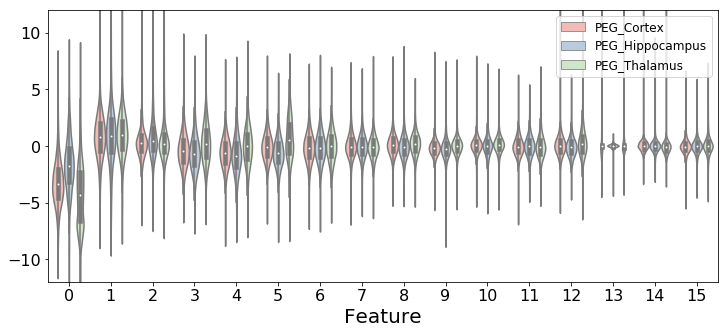

In [14]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=16, yrange=[-12, 12])

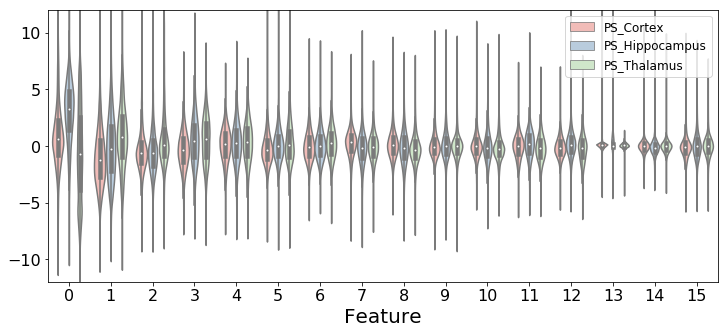

In [29]:
lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=16, yrange=[-12, 12])

In [ ]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_2D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4])

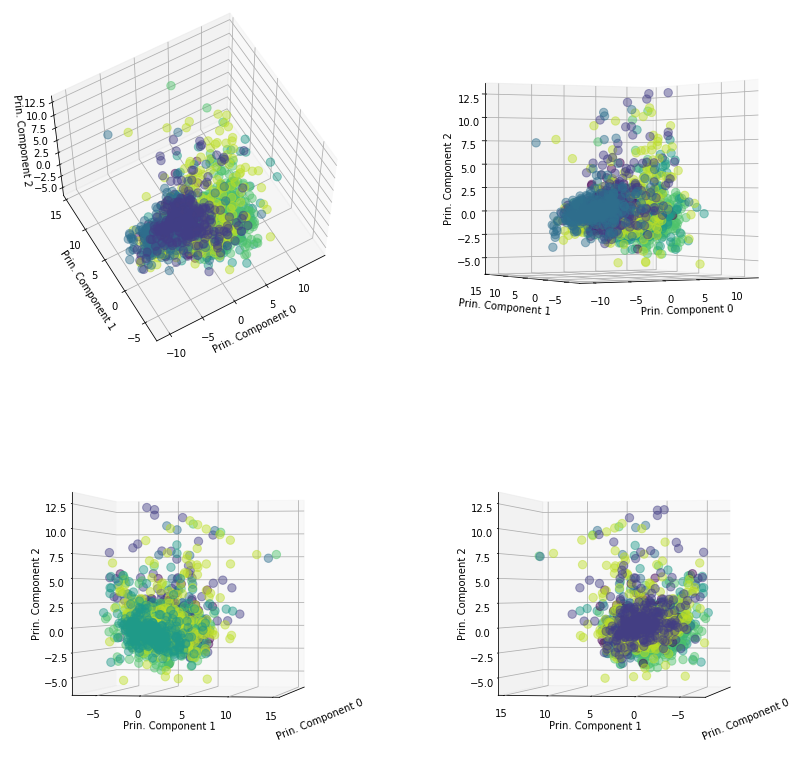

In [17]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

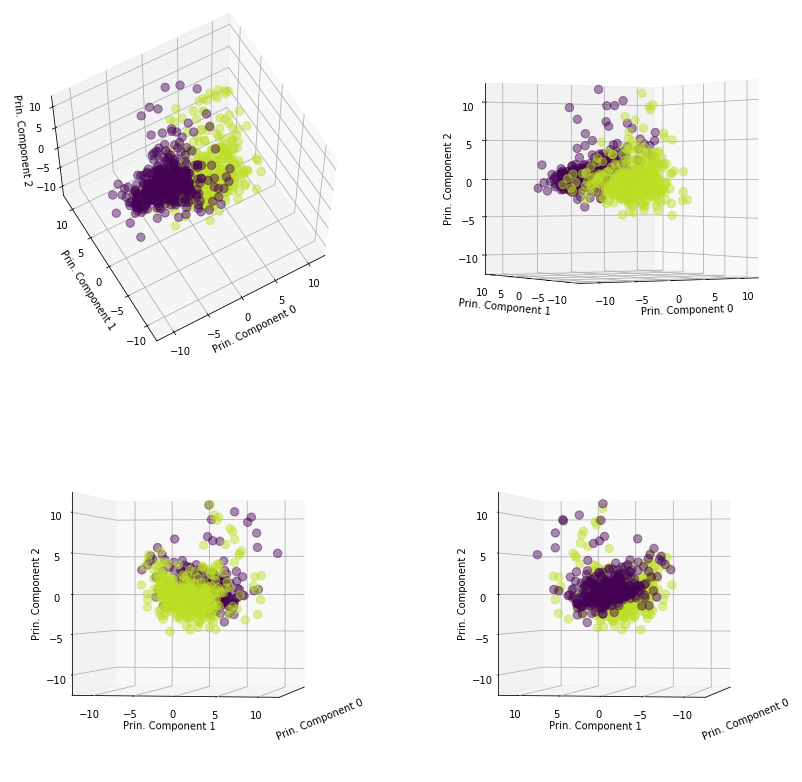

In [22]:
xr = 12
lvals = ['PEG', 'PS']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Particle Type', lvals=lvals, randcount=400, ylim=[-xr, xr],
                              xlim=[-xr, xr], zlim=[-xr, xr], alpha=0.45)

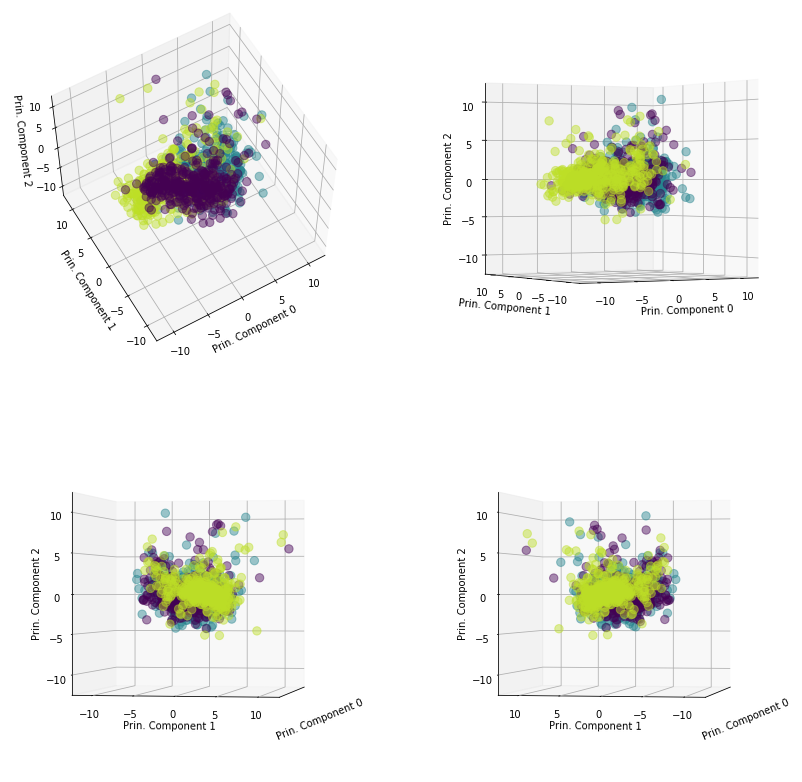

In [23]:
lvals = ['Cortex', 'Hippocampus', 'Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region', lvals=lvals, randcount=400, ylim=[-xr, xr],
                              xlim=[-xr, xr], zlim=[-xr, xr], alpha=0.45)

In [15]:
ncomp = 16
trainp = np.array([])
testp = np.array([])
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Region and Type', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region and Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.5645457478224185
Run 1: 0.5664175638739503
Run 2: 0.5653611222388054
Run 3: 0.5644110337884068
Run 4: 0.5634325844887426
Run 5: 0.5653823928757546
Run 6: 0.5697588264280574
Run 7: 0.568604894373562
Run 8: 0.5676246725208186
Run 9: 0.5472615827480954
Run 10: 0.566743713640505
Run 11: 0.564031707429479
Run 12: 0.5669404670322853
Run 13: 0.5680961716398597
Run 14: 0.5672932050950266
Run 15: 0.5503227819157045
Run 16: 0.5735857685258385
Run 17: 0.5683744624732787
Run 18: 0.5587441815945179
Run 19: 0.5684435920433637


In [16]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.55128125 +/ 0.009986813136929352
0.5647688236274236 +/ 0.00606429996181455


In [18]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['PEG', 'PS']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Particle Type', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.8735815143984487
Run 1: 0.861939385774907
Run 2: 0.8701728948273356
Run 3: 0.8703678756660368
Run 4: 0.8629958274100518
Run 5: 0.8773145111830374
Run 6: 0.8780625285824184
Run 7: 0.8729504855022884
Run 8: 0.864754200064521
Run 9: 0.873829671829523
Run 10: 0.878021759861599
Run 11: 0.8732039605926
Run 12: 0.8783408194158374
Run 13: 0.8747389915591023
Run 14: 0.8722024681029074
Run 15: 0.8734574356829116
Run 16: 0.8745723715696666
Run 17: 0.867398849258541
Run 18: 0.871553713675956
Run 19: 0.879168601703778


In [19]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9470625 +/ 0.010836317697908276
0.8724313933330734 +/ 0.004877414406767081


In [20]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Region', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.5876970635885692
Run 1: 0.5941899255173196
Run 2: 0.5911943108136373
Run 3: 0.5941402940311048
Run 4: 0.6039318772400639
Run 5: 0.5801459874715948
Run 6: 0.5974656036075
Run 7: 0.6023472147873468
Run 8: 0.59264957689158
Run 9: 0.6002945983217467
Run 10: 0.5941296587126301
Run 11: 0.6004771712888942
Run 12: 0.5943600906129134
Run 13: 0.5950957001407408
Run 14: 0.6034036564224916
Run 15: 0.5891487845603537
Run 16: 0.5888084543691661
Run 17: 0.5899872021667689
Run 18: 0.6062556943267666
Run 19: 0.6018952137521758


In [21]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6692708333333334 +/ 0.010587659056918833
0.5953809039311683 +/ 0.006457861747961932


In [24]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final,
                                       'Region', lvals, equal_sampling=True,
                                       tsize=900, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))

    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Particle Type']=='PEG'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Particle Type']=='PEG']['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.46946227102964994
Run 1: 0.492900597229257
Run 2: 0.516645052125368
Run 3: 0.4843735215375453
Run 4: 0.47727690175495235
Run 5: 0.514424227581639
Run 6: 0.5025742640387837
Run 7: 0.4967633847815076
Run 8: 0.4608183098356367
Run 9: 0.44276784869450025
Run 10: 0.49674668685260737
Run 11: 0.510923228488893
Run 12: 0.43430756471838944
Run 13: 0.48138459226440616
Run 14: 0.48571492182586284
Run 15: 0.45951587138141964
Run 16: 0.5004647590210561
Run 17: 0.49272805196395475
Run 18: 0.5170680663241736
Run 19: 0.5003590054713547


In [25]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6399814814814815 +/ 0.011723538630664852
0.48686095634604787 +/ 0.02300351845782954


In [26]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final,
                                       'Region', lvals, equal_sampling=True,
                                       tsize=900, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))

    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Particle Type']=='PS'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Particle Type']=='PS']['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.653597576041301
Run 1: 0.6628252643077284
Run 2: 0.6600293891988193
Run 3: 0.6597042874419693
Run 4: 0.6624403438276181
Run 5: 0.6740867891650086
Run 6: 0.6600501957112577
Run 7: 0.6631477652505234
Run 8: 0.66364452073499
Run 9: 0.6407131432138259
Run 10: 0.6643857527406078
Run 11: 0.6622894966124397
Run 12: 0.6508017009323919
Run 13: 0.6639644208637303
Run 14: 0.6608980610931221
Run 15: 0.6714027490604559
Run 16: 0.6559175021781818
Run 17: 0.6405414894862091
Run 18: 0.6661204957151589
Run 19: 0.6482477015305791


In [27]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6425370370370371 +/ 0.012038048390561393
0.6592404322552958 +/ 0.008554532112794916
